In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alle .pkl-Dateien im aktuellen Arbeitsverzeichnis finden
pkl_files = [f for f in os.listdir() if f.endswith(".pkl")]

In [28]:
data_dict = {}
df_list = []

# Jede Datei laden und als ein großes DataFrame abspeichern
for file in pkl_files:
    if file != "logistic_regression_self_made.pkl":
        df = pd.read_pickle(file)
        df_list.append(df)

In [29]:
combined_df = pd.concat(df_list, axis=0, ignore_index=True)

In [30]:
combined_df 

,Fold,Modell,ROC AUC,Accuracy
0,1,eSPA,0.675000,NaN
1,2,eSPA,0.794444,NaN
2,3,eSPA,0.850000,NaN
3,4,eSPA,0.580556,NaN
4,5,eSPA,0.819444,NaN
...,...,...,...,...
65,6,Random Forest,0.830409,0.750000
66,7,Random Forest,0.824561,0.821429
67,8,Random Forest,0.660819,0.678571
68,9,Random Forest,0.696875,0.678571


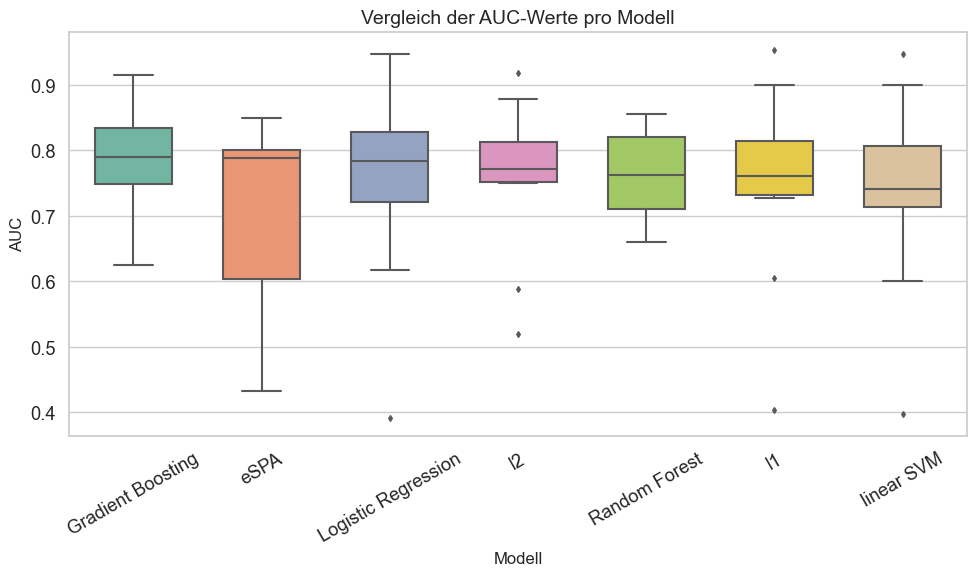

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionaler Style (professionell & sauber)
sns.set(style="whitegrid", font_scale=1.2)

ordered_models = combined_df.groupby("Modell")["ROC AUC"].median().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Modell",
    y="ROC AUC",
    data=combined_df,
    palette="Set2",        # oder "pastel", "muted", "deep"
    width=0.6,
    fliersize=3,
    order = ordered_models            # Größe der Ausreißerpunkte
)



# Achsentitel
ax.set_title("Vergleich der AUC-Werte pro Modell", fontsize=14)
ax.set_xlabel("Modell", fontsize=12)
ax.set_ylabel("AUC", fontsize=12)

# Layout sauber anpassen
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


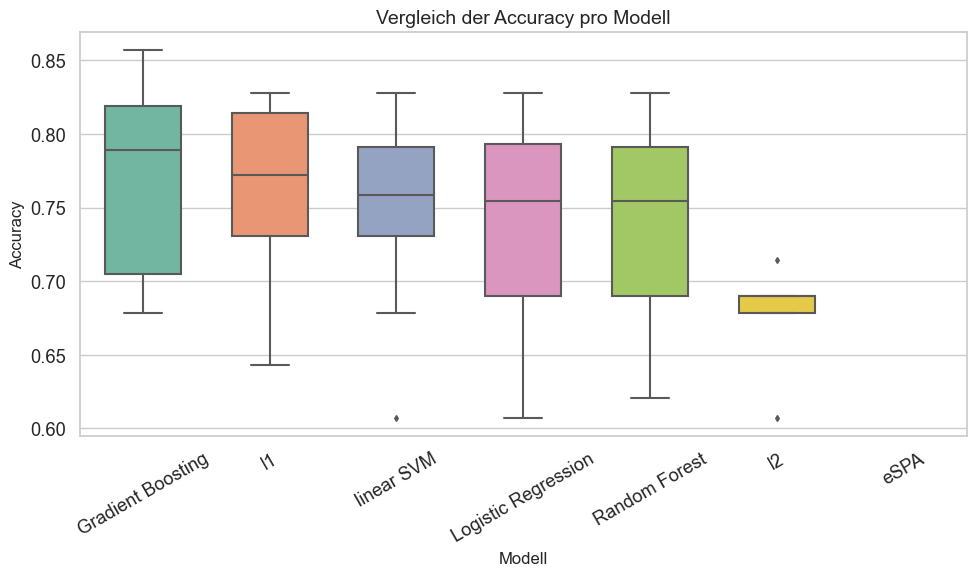

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optionaler Style (professionell & sauber)
sns.set(style="whitegrid", font_scale=1.2)

ordered_models = combined_df.groupby("Modell")["Accuracy"].median().sort_values(ascending=False).index


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Modell",
    y="Accuracy",
    data=combined_df,
    palette="Set2",        # oder "pastel", "muted", "deep"
    width=0.6,
    fliersize=3,
    order = ordered_models            # Größe der Ausreißerpunkte
)



# Achsentitel
ax.set_title("Vergleich der Accuracy pro Modell", fontsize=14)
ax.set_xlabel("Modell", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)

# Layout sauber anpassen
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()